In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import matplotlib.pyplot as plt
import missingno as miss


In [2]:
houseprice_df=pd.read_csv('house_price.csv')
houseprice_df_copy=houseprice_df.copy()
houseprice_df_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
houseprice_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

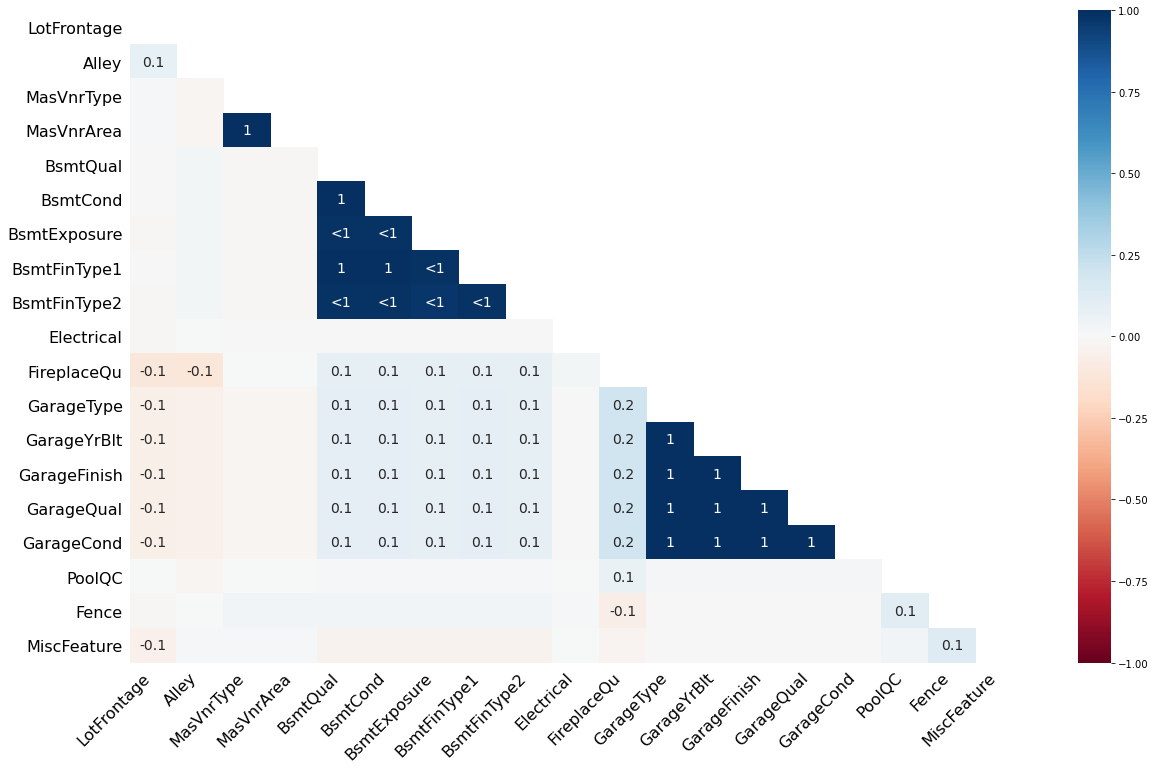

In [4]:
miss.heatmap(houseprice_df)

In [5]:
new_df=pd.DataFrame({'col_name':houseprice_df.columns,
                     'na_count':houseprice_df.isnull().sum(),
                     'na_per':houseprice_df.isnull().sum()/houseprice_df.shape[0]*100})

new_df

,col_name,na_count,na_per
Id,Id,0,0.000000
MSSubClass,MSSubClass,0,0.000000
MSZoning,MSZoning,0,0.000000
LotFrontage,LotFrontage,259,17.739726
LotArea,LotArea,0,0.000000
...,...,...,...
MoSold,MoSold,0,0.000000
YrSold,YrSold,0,0.000000
SaleType,SaleType,0,0.000000
SaleCondition,SaleCondition,0,0.000000


In [6]:
cols_grt50=list(new_df[new_df['na_per']>50]['col_name'].values)

cols_to_drop=[]
for col in houseprice_df.columns:
    if len(houseprice_df[col].value_counts())==1 or len(houseprice_df[col].value_counts())==houseprice_df.shape[0]:
        cols_to_drop.append(col)
        
cols_to_drop=cols_to_drop+cols_grt50


houseprice_df.drop(columns=cols_to_drop,inplace=True)

houseprice_df.shape

(1460, 76)

In [7]:
houseprice_df.drop('SalePrice',axis=1,)
y=houseprice_df.SalePrice
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
#check the correlation of each input variable with the output variable
#pcc
corr_cols=[]
for col in houseprice_df.columns:
    if houseprice_df[col].dtype=='int64' or houseprice_df[col].dtype=='float64':
        res1=np.corrcoef(houseprice_df[col],houseprice_df['SalePrice'])
        if res1[0][1]>0.10:
            corr_cols.append(col)
#Anova test
for col in houseprice_df.columns:
    if houseprice_df[col].dtype=='object':
        categories_list=list(houseprice_df[col].value_counts().index)
        res2=f_oneway(*(houseprice_df[houseprice_df[col]==category]['SalePrice'] for category in categories_list))
        if res2[1]<0.05:
            corr_cols.append(col)
corr_df=houseprice_df[corr_cols]            

In [9]:
print(res1)
print(res2)

[[1. 1.]
 [1. 1.]]
F_onewayResult(statistic=45.5784283096957, pvalue=7.988268404991176e-44)


In [10]:
houseprice_df=corr_df
houseprice_df

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,8450,7,2003,2003,706,150,856,856,854,1710,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,9600,6,1976,1976,978,284,1262,1262,0,1262,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,11250,7,2001,2002,486,434,920,920,866,1786,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,9550,7,1915,1970,216,540,756,961,756,1717,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,14260,8,2000,2000,655,490,1145,1145,1053,2198,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,0,953,953,953,694,1647,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,13175,6,1978,1988,790,589,1542,2073,0,2073,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,9042,7,1941,2006,275,877,1152,1188,1152,2340,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,9717,5,1950,1996,49,0,1078,1078,0,1078,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [11]:
x_train,x_test,y_train,y_test=train_test_split(houseprice_df,y,test_size=0.2,random_state=32)#to get constant values wheexecuting


In [12]:
print("houseprice_df:",houseprice_df.shape)
print("y:",y.shape)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)




houseprice_df: (1460, 58)
y: (1460,)
x_train: (1168, 58)
x_test: (292, 58)
y_train: (1168,)
y_test: (292,)


# Filling Missing Value

In [13]:
 for col in x_train.columns:
        if x_train[col].dtype=='int64' or  x_train[col].dtype=='float64':
            x_train[col].fillna(x_train[col].mean(),inplace=True)
            

In [14]:
for col in x_test.columns:
     if x_test[col].dtype=='int64' or x_test[col].dtype=='float64':
        x_test[col].fillna(x_train[col].mean(),inplace=True)
        
    

In [15]:
for col in x_train.columns:
      if x_train[col].dtype=='object':
        x_train[col].fillna(x_train[col].mode()[0],inplace=True)

In [16]:
for col in x_train.columns:
      if x_test[col].dtype=='object':
        x_test[col].fillna(x_train[col].mode()[0],inplace=True)

# Scaling continuous variables

In [17]:
scaled=StandardScaler()
con_cols=[col for col in x_train.columns if x_train[col].dtype=='int64' or x_train[col].dtype=='float64']#LIST OF CONT COLMS

for col in con_cols:
    if x_train[col].dtype=='int64' or x_train[col].dtype=='float64':
        x_train[col]=scaled.fit_transform(np.array(x_train[col]).reshape(-1,1))
        x_test[col]=scaled.transform(np.array(x_test[col]).reshape(-1,1))
       

In [18]:
x_train

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
457,4.702739,-1.526697,-0.543462,0.455005,1.466206,-0.707790,0.697752,1.286791,-0.798947,0.258605,...,Gd,Min1,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
403,0.170960,1.384621,0.902843,0.649710,-0.971274,1.319105,0.197960,-0.003211,1.694697,1.381540,...,Gd,Typ,TA,BuiltIn,Fin,TA,TA,Y,WD,Abnorml
1092,-0.235541,-0.071038,-1.496708,-1.686745,-0.047391,0.449787,0.287609,0.579621,-0.108539,0.316623,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
917,0.727284,-1.526697,-0.477721,-1.394688,1.341711,-1.100458,0.182272,0.162572,-0.798947,-0.553651,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
699,-0.689193,0.656791,1.100067,0.941767,-0.936328,1.850229,0.758264,0.582211,-0.798947,-0.250459,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.043171,-0.798868,-0.839297,-1.686745,0.295517,-0.514860,-0.313037,-0.306284,0.359303,0.062092,...,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
88,-0.227830,-2.254526,-1.825414,-0.129108,-0.971274,1.028576,-0.088916,-0.396947,-0.798947,0.002202,...,Fa,Typ,Gd,Attchd,Unf,TA,TA,N,ConLD,Abnorml
892,-0.233999,-0.071038,-0.247627,0.893090,0.476799,-0.371865,0.014180,-0.254477,-0.798947,-0.854972,...,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1334,-0.900045,-0.798868,-0.017533,-0.713222,0.699579,-1.270690,-0.644738,-1.039358,0.563700,-0.299119,...,TA,Min1,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


# one hot encoding categorical variables

In [19]:
oe_train=pd.get_dummies(x_train[[col for col in x_train.columns if x_train[col].dtype=='object']])#LIST OF CAT COLMS:TRAIN
oe_test=pd.get_dummies(x_test[[col for col in x_test.columns if x_test[col].dtype=='object']])#LIST OF CAT COLMS:TEST

oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)



In [20]:
x_train_final=pd.concat([x_train[con_cols],oe_train_final],axis=1)#concatinating train data
x_test_final=pd.concat([x_test[con_cols],oe_test_final],axis=1)#concatinating test data


In [21]:
x_train_final

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,PavedDrive_Y,SaleType_COD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
457,4.702739,-1.526697,-0.543462,0.455005,1.466206,-0.707790,0.697752,1.286791,-0.798947,0.258605,...,1,0,0,0,1,0,0,0,1,0
403,0.170960,1.384621,0.902843,0.649710,-0.971274,1.319105,0.197960,-0.003211,1.694697,1.381540,...,1,0,0,0,1,1,0,0,0,0
1092,-0.235541,-0.071038,-1.496708,-1.686745,-0.047391,0.449787,0.287609,0.579621,-0.108539,0.316623,...,1,0,0,0,1,0,0,0,1,0
917,0.727284,-1.526697,-0.477721,-1.394688,1.341711,-1.100458,0.182272,0.162572,-0.798947,-0.553651,...,1,0,0,0,1,0,0,0,1,0
699,-0.689193,0.656791,1.100067,0.941767,-0.936328,1.850229,0.758264,0.582211,-0.798947,-0.250459,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.043171,-0.798868,-0.839297,-1.686745,0.295517,-0.514860,-0.313037,-0.306284,0.359303,0.062092,...,1,0,0,0,1,0,0,0,1,0
88,-0.227830,-2.254526,-1.825414,-0.129108,-0.971274,1.028576,-0.088916,-0.396947,-0.798947,0.002202,...,0,0,0,0,0,1,0,0,0,0
892,-0.233999,-0.071038,-0.247627,0.893090,0.476799,-0.371865,0.014180,-0.254477,-0.798947,-0.854972,...,1,0,0,0,1,0,0,0,1,0
1334,-0.900045,-0.798868,-0.017533,-0.713222,0.699579,-1.270690,-0.644738,-1.039358,0.563700,-0.299119,...,1,0,0,0,1,0,0,0,1,0


In [22]:
x_test_final

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,PavedDrive_Y,SaleType_COD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
363,-0.975837,-0.071038,0.048208,1.087795,-0.617446,-0.542097,-1.276761,-1.769841,0.345676,-1.006568,...,1,0,0,0,1,0,0,0,1,0
529,2.437896,-0.071038,-0.444850,-0.469841,1.691170,0.581433,2.201608,3.493782,-0.798947,1.853173,...,1,0,0,0,1,0,1,0,0,0
1394,-0.715302,0.656791,1.165808,1.039119,1.365736,-0.621539,0.679822,0.864561,-0.798947,-0.046459,...,1,0,0,1,0,0,0,0,0,1
803,0.369364,2.112450,1.231549,1.185147,-0.971274,2.665073,1.527002,1.470707,1.671986,2.427741,...,1,0,0,1,0,0,0,0,0,1
832,-0.109074,0.656791,1.067196,0.893090,0.083657,-0.231140,-0.250283,-0.583453,1.217770,0.569284,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,-0.228711,-0.071038,0.771361,0.455005,0.806601,-1.011938,-0.279419,-0.596405,0.983849,0.367155,...,1,0,0,0,1,0,0,0,1,0
599,-0.946093,-0.071038,0.311173,-0.226461,-0.794360,-1.218486,-0.754557,-1.166285,1.108759,0.058348,...,1,1,0,0,0,0,0,0,1,0
1141,-0.025791,-0.798868,0.179691,-0.421165,-0.139124,-0.365056,-0.611119,-0.202669,0.972494,0.642275,...,1,0,0,0,1,0,0,0,1,0
498,-0.301639,-0.798868,-0.116145,0.941767,0.011581,-0.331010,-0.422857,-0.692249,-0.798947,-1.171265,...,1,0,0,0,1,0,0,0,1,0


In [23]:
vif_data=pd.DataFrame()
vif_data['feature']=x_train_final.columns
vif_data['VIF']=[variance_inflation_factor(x_train_final.values,i) for i in range(len(x_train_final.columns))]
vif_data

,feature,VIF
0,LotArea,2.167621
1,OverallQual,5.464262
2,YearBuilt,12.437247
3,YearRemodAdd,3.025088
4,BsmtFinSF1,33.830373
...,...,...
207,SaleCondition_Abnorml,31.084884
208,SaleCondition_Alloca,4.991394
209,SaleCondition_Family,7.702164
210,SaleCondition_Normal,68.473994


In [24]:
vif_grt30=list(vif_data[vif_data['VIF']>50]['feature'].values)
vif_grt30
len(vif_grt30)


127

In [25]:
#cols_to_drop=[]        
#cols_to_drop=vif_grt30
#x_train_final.drop(columns=cols_to_drop,inplace=True)


# applying linear regression

In [26]:
linreg=LinearRegression()
linreg.fit(x_train_final,y_train)#fitting on x_train final and output y_train
linreg_pred=linreg.predict(x_test_final)#prediction on x_test data

In [27]:
linreg.coef_#to get coefficient of predicted values

array([-9.81452002e-12,  6.18456397e-11, -5.45696821e-12,  3.63797881e-12,
       -3.54702934e-11,  3.50155460e-11, -3.86535248e-11, -5.00222086e-11,
       -3.63797881e-11,  3.36513040e-11, -2.41016096e-11, -4.82032192e-11,
       -3.00133252e-11,  1.81898940e-12, -2.00088834e-11, -2.36468622e-11,
       -4.09272616e-11,  1.00044417e-11,  2.66027200e-11, -1.54614099e-11,
        1.54614099e-11,  7.91610706e+04,  3.70375211e+02,  3.70375211e+02,
        3.70375211e+02,  3.70375211e+02,  3.70375211e+02, -2.66051628e+02,
       -2.66051628e+02, -2.66051628e+02, -2.66051628e+02, -2.16788730e+02,
       -2.16788730e+02, -2.16788730e+02, -2.16788730e+02,  5.24713917e+02,
        5.24713917e+02,  5.24713917e+02,  5.24713917e+02,  5.24713917e+02,
       -6.87988423e+01, -6.87988423e+01, -6.87988423e+01, -6.87988423e+01,
       -6.87988423e+01, -6.87988423e+01, -6.87988423e+01, -6.87988423e+01,
       -6.87988423e+01, -6.87988423e+01, -6.87988423e+01, -6.87988423e+01,
       -6.87988423e+01, -

In [28]:
print(linreg.score(x_train_final,y_train))
print(linreg.score(x_test_final,y_test))
# check the overfitting problem

1.0
1.0


In [29]:
linreg_pred
len(linreg_pred)


292

In [30]:
print("Average error of the model::",math.sqrt(mean_squared_error(y_test,linreg_pred)))

Average error of the model:: 1.889140410279205e-10


# Lasso regularization

In [31]:
lasso=Lasso(alpha=0.001)
lasso.fit(x_train_final,y_train)
lasso_coef_df=pd.DataFrame({'lasso_coef':lasso.coef_})#coef can go down to zero
len(lasso_coef_df[lasso_coef_df['lasso_coef']==0])#it reduces the difference of accuracy between train and test

2

In [32]:
lasso.score(x_test_final,y_test)

0.9999984154757818

# Ridge regularization

In [33]:
ridge=Ridge()#it regularize the L2 norm
ridge.fit(x_test_final,y_test)
ridge_coef_df=pd.DataFrame({'ridge_col':ridge.coef_})
len(ridge_coef_df[ridge_coef_df['ridge_col']==0])

0

In [34]:
ridge.score(x_test_final,y_test)

0.9998992371629504

In [35]:
r2_score(y_test,linreg_pred)

1.0

# visualization of best fit line

In [43]:
m, b = np.polyfit(y_test,linreg_pred,1)# m=Slope, b=intercept
m,b

(0.9999999999999988, 8.175229690698711e-11)

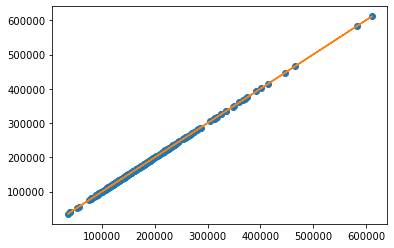

In [37]:
plt.plot(y_test,linreg_pred, 'o')
plt.plot(y_test, m*y_test + b)#


In [38]:
linreg.intercept_

180215.10921193624

In [39]:
linreg.fit_intercept

True

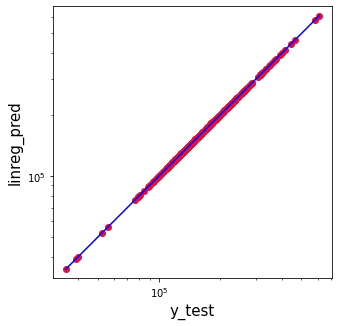

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, linreg_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(linreg_pred), max(y_test))
p2 = min(min(linreg_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('y_test', fontsize=15)
plt.ylabel('linreg_pred', fontsize=15)
plt.axis('equal')
plt.show()